In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# An example of a violin plot

In [4]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

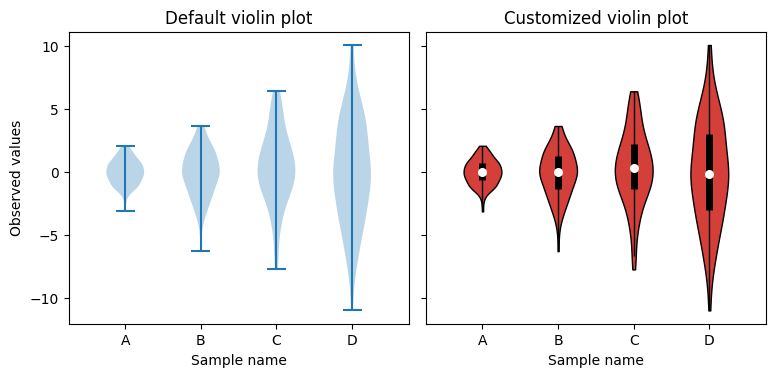

In [6]:
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

# Assignment!

In [3]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_4g = pd.read_csv('Data/4G_Passive_measurements.csv')
print(fd_4g.head(10))

fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
print(fd_5g.head(10))


   Unnamed: 0        Date          Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                 campaign
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
2      291097  14.01.2021  09:19:28.840 

In [8]:
print(list(fd.columns))
print("5G-")

['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ', 'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band', 'campaign']


In [9]:
grouped_by_operator = fd_4g.groupby('MNC')
signal_quality_columns = ['RSRP', 'RSRQ', 'SINR']
summary_stats = grouped_by_operator[signal_quality_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics for each operator
print(summary_stats)


               RSRP                         RSRQ                       SINR                  
               mean median        std       mean median       std      mean median        std
MNC                                                                                          
"Op"[1] -100.161485 -98.98  15.604314 -20.280126 -19.29  5.536481  0.833658   2.23  11.473351
"Op"[2]  -98.142377 -99.16  12.642518 -20.498862 -19.74  5.272834  0.932823   3.17   9.833226


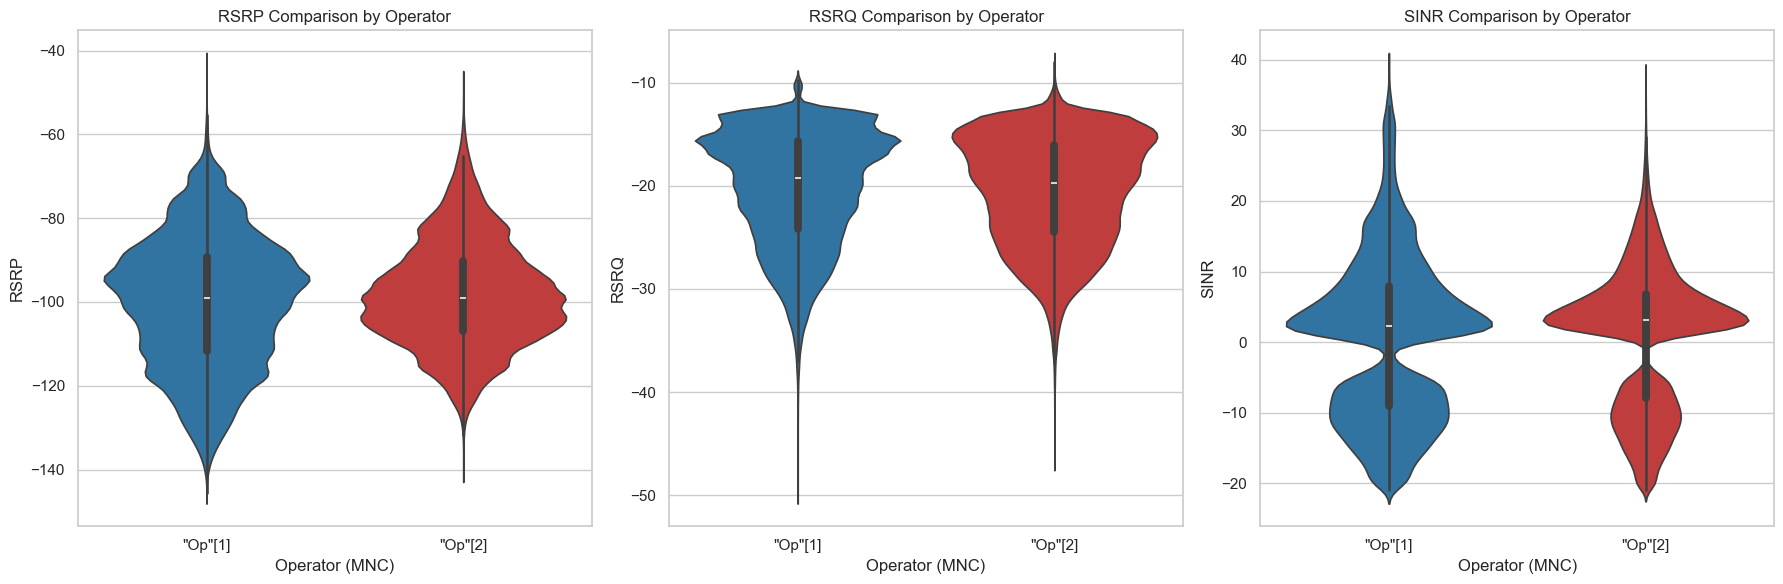

In [24]:
# Create a custom color palette (Blue for "Op"[1], Red for "Op"[2])
custom_palette = {"\"Op\"[1]": "#1f77b4", "\"Op\"[2]": "#d62728"}  # Blue for "Op"[1], Red for "Op"[2]

# Create subplots for RSRP, RSRQ, and SINR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Violin plot for RSRP
sns.violinplot(x='MNC', y='RSRP', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[0])
axes[0].set_title('RSRP Comparison by Operator')
axes[0].set_xlabel('Operator (MNC)')
axes[0].set_ylabel('RSRP')

# Violin plot for RSRQ
sns.violinplot(x='MNC', y='RSRQ', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[1])
axes[1].set_title('RSRQ Comparison by Operator')
axes[1].set_xlabel('Operator (MNC)')
axes[1].set_ylabel('RSRQ')

# Violin plot for SINR
sns.violinplot(x='MNC', y='SINR', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[2])
axes[2].set_title('SINR Comparison by Operator')
axes[2].set_xlabel('Operator (MNC)')
axes[2].set_ylabel('SINR')

# Adjust layout
plt.tight_layout()
plt.show()

## Summary of Violin Plots for Signal Metrics

### 1. **RSRP (Reference Signal Received Power) Comparison**
   - **RSRP** measures the power of the received signal (in dBm). Lower values indicate weaker signals (closer to -140 dBm), while higher values indicate stronger signals (closer to -60 dBm).
   - **Observations:**
     - Both operators show similar distributions, with most values ranging between -140 dBm and -60 dBm.
     - **Operator 1 ("Op"[1])** has slightly stronger signals on average compared to **Operator 2 ("Op"[2])**, as indicated by the thicker distribution around -100 dBm for Operator 1 and a thinner one for Operator 2.

### 2. **RSRQ (Reference Signal Received Quality) Comparison**
   - **RSRQ** measures the quality of the signal, considering factors like interference and noise (in dB). Lower values indicate poorer quality.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows better signal quality on average, with RSRQ values centered around -10 to -20 dB.
     - **Operator 2 ("Op"[2])** has a similar distribution but with slightly more data spread out towards lower quality values (between -20 and -40 dB).

### 3. **SINR (Signal to Interference and Noise Ratio) Comparison**
   - **SINR** measures the ratio of signal to interference and noise (in dB). Higher values indicate cleaner, stronger signals with less interference.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows a higher SINR range, typically between 0 and 30 dB, indicating better signal quality with less interference.
     - **Operator 2 ("Op"[2])** has lower SINR values, ranging from -10 to 20 dB, indicating more interference and lower signal quality on average.

---

### Key Takeaways
- **RSRP (Signal Strength):** Both operators have similar signal strength, but **Operator 1 ("Op"[1])** has a slightly stronger distribution.
- **RSRQ (Signal Quality):** **Operator 1** shows better signal quality compared to **Operator 2**, with values concentrated closer to 0 dB.
- **SINR (Signal to Interference and Noise Ratio):** **Operator 1** provides better overall signal quality with less interference, while **Operator 2** experiences more interference and lower SINR values.


# RSRP

C:\Users\elmir\AppData\Local\Temp\ipykernel_16148\104648982.py:37: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_16148\104648982.py:57: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


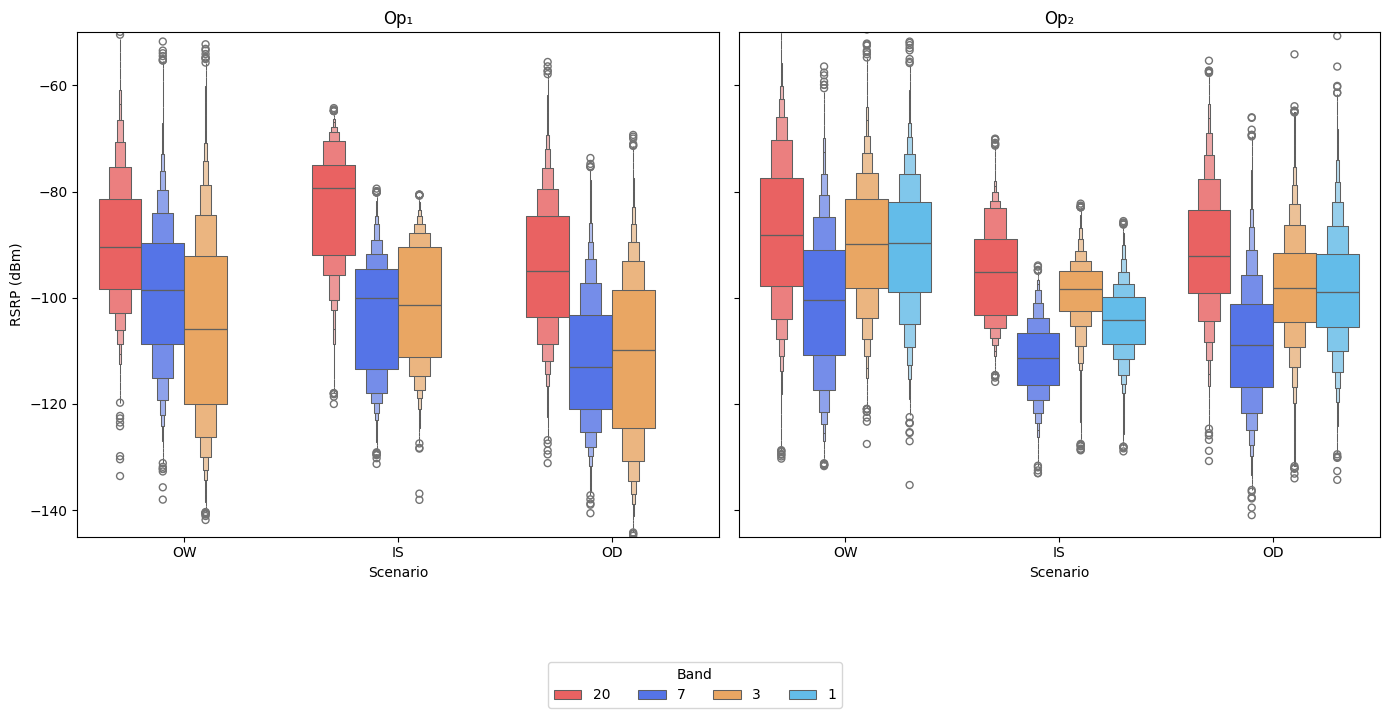

In [40]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]

# Set up the exact color palette, now including Band 1
palette = {
    20: '#cb463f',  # Correct Red for Band 20
    3: '#f3b97c',   # Correct Orange for Band 3
    1: '#5DADE2',   # Correct Light Blue for Band 1
    7: '#5586b9'    # Correct Dark Blue for Band 7
}

palette = {
    20: '#e74c47',  # Brighter Red for Band 20
    3: '#f7c594',   # Brighter Orange for Band 3
    1: '#67c8f2',   # Brighter Light Blue for Band 1
    7: '#6c9edb'    # Brighter Dark Blue for Band 7
}

palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('RSRP (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('RSRP (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image
axes[0].set_ylim(-145, -50)  # Adjust to match the RSRP scale
axes[1].set_ylim(-145, -50)

plt.tight_layout()
plt.show()

# SINR

C:\Users\elmir\AppData\Local\Temp\ipykernel_16148\1817541966.py:37: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_16148\1817541966.py:57: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


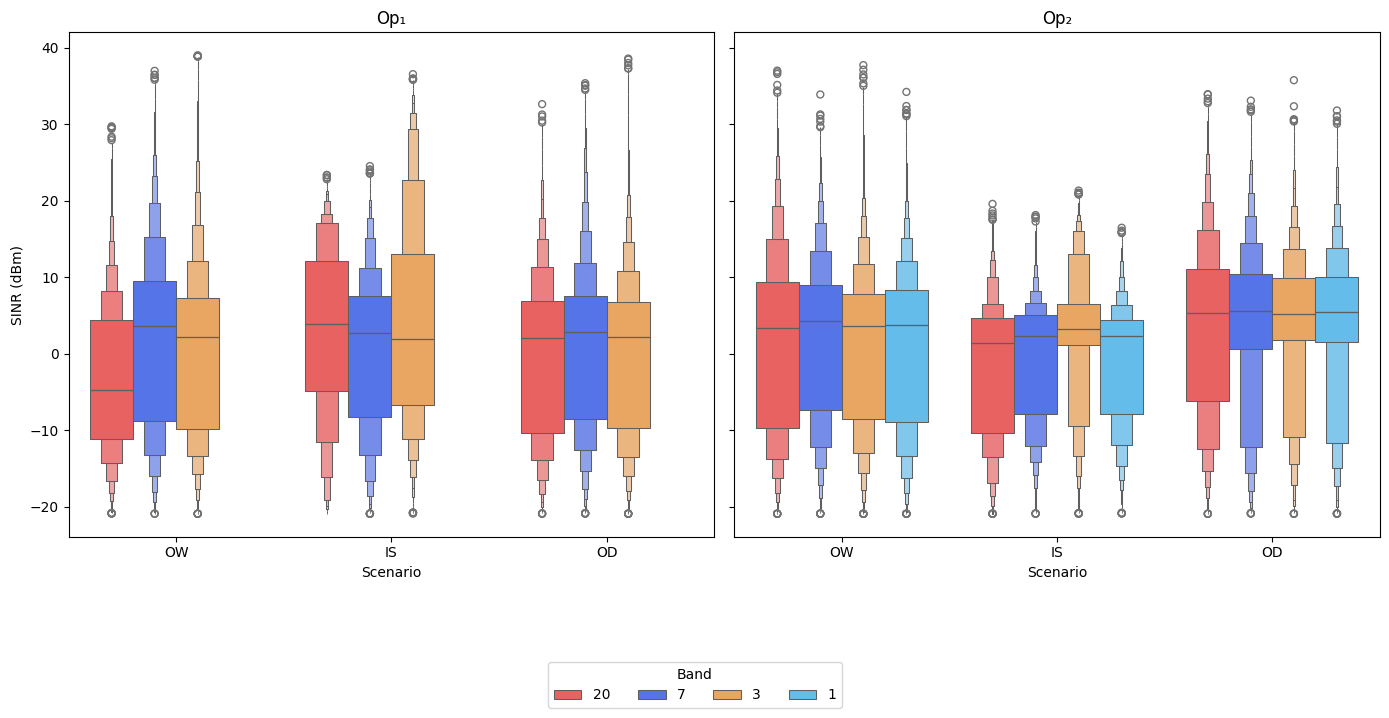

In [39]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]
SRQdd
# Set up the exact color palette, now including Band 1
palette = {
    20: '#cb463f',  # Correct Red for Band 20
    3: '#f3b97c',   # Correct Orange for Band 3
    1: '#5DADE2',   # Correct Light Blue for Band 1
    7: '#5586b9'    # Correct Dark Blue for Band 7
}

palette = {
    20: '#e74c47',  # Brighter Red for Band 20
    3: '#f7c594',   # Brighter Orange for Band 3
    1: '#67c8f2',   # Brighter Light Blue for Band 1
    7: '#6c9edb'    # Brighter Dark Blue for Band 7
}

palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('SINR (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('SINR (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image

plt.tight_layout()
plt.show()

# RSRP (x-axis) and SINR (y-axis) for both operators, with color coding for different frequency bands. However, it looks like the data points are densely packed, making it a bit challenging to interpret at a glance

## Patterning: You might notice that as RSRP (signal strength) improves (moving right on the x-axis), SINR (signal quality) also generally improves (moving up on the y-axis). However, there is variability, especially for lower signal strengths, which may suggest interference or congestion in some cases.

## Cluster Density: The plot is extremely dense with overlapping points, which is why it’s difficult to extract patterns immediately.

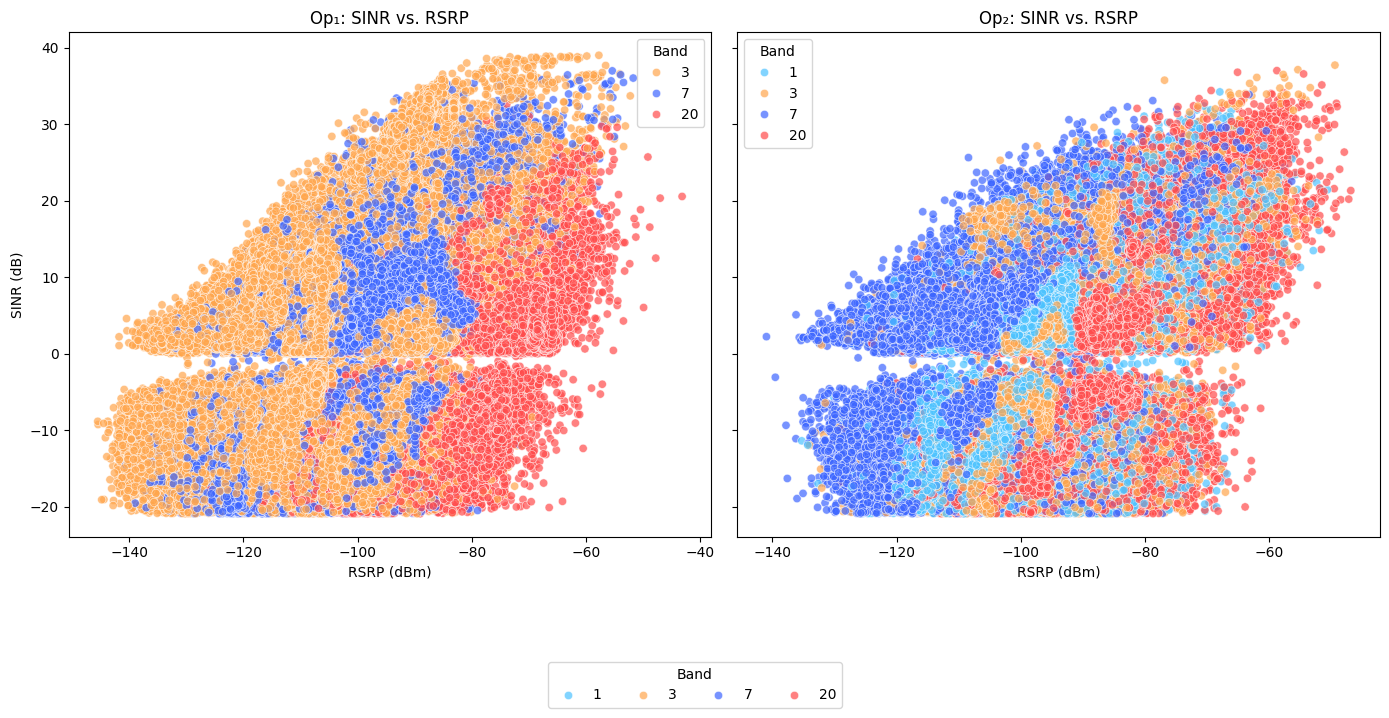

In [41]:
# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

# Set up the color palette for the different bands
palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for Operator 1
sns.scatterplot(
    x='RSRP',
    y='SINR',
    hue='Band',
    data=op1_data,
    palette=palette,
    ax=axes[0],
    alpha=0.7  # Add some transparency for better visibility
)
axes[0].set_title('Op₁: SINR vs. RSRP')
axes[0].set_xlabel('RSRP (dBm)')
axes[0].set_ylabel('SINR (dB)')

# Scatter plot for Operator 2
sns.scatterplot(
    x='RSRP',
    y='SINR',
    hue='Band',
    data=op2_data,
    palette=palette,
    ax=axes[1],
    alpha=0.7  # Add some transparency for better visibility
)
axes[1].set_title('Op₂: SINR vs. RSRP')
axes[1].set_xlabel('RSRP (dBm)')
axes[1].set_ylabel('SINR (dB)')

# Adjust the layout
plt.tight_layout()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

This aggregates data into hexagonal bins, showing the density of points in each region. This way, you can more easily identify trends or clusters of data without overwhelming the plot.

This hexbin plot shows a much clearer view of the distribution of data points between SINR and RSRP for both operators compared to the scatter plot. Here's how you might interpret this plot and some potential insights:

x-axis (RSRP in dBm): This shows the signal strength received by the User Equipment (UE) from the cell tower. Higher values (closer to 0 dBm) mean stronger signals, while more negative values (closer to -140 dBm) indicate weaker signals.

y-axis (SINR in dB): This shows the Signal-to-Interference-plus-Noise Ratio (SINR), which is a measure of signal quality. Higher values indicate better quality (less interference), and lower or negative values indicate poor signal quality.

Color (Counts): The color intensity shows the number of data points that fall into each bin. Darker colors represent areas where more data points are concentrated, indicating common signal strength and quality combinations.

Interpretation of the Plots:
Op₁ vs. Op₂ Comparison:

Op₁ (left) generally shows a wider distribution of data points, especially in the Band 3 and Band 7 plots. This could suggest that Op₁ is operating across a broader range of conditions, including both strong and weak signal areas.
Op₂ (right) has denser clusters around certain values of RSRP and SINR, which could indicate more consistent performance in certain bands (e.g., Band 20), but also more limitations in others (e.g., Band 3).
Band Performance:

Band 20: For both operators, Band 20 shows a consistent range of RSRP around -100 to -80 dBm, with SINR mostly in the positive range (0-20 dB). This band likely provides stable and reliable service, with better signal quality and lower interference.
Band 3: There seems to be a significant number of data points concentrated in the weak signal region (RSRP -120 to -100 dBm), particularly for Op₁. This band might struggle more in certain areas, possibly indicating lower coverage or more interference.
Band 7: For Op₁, Band 7 appears to have a wider distribution of SINR, indicating more variability in signal quality, despite a stronger signal range (RSRP -100 to -80 dBm). Op₂ seems to have a tighter, more consistent performance in this band.
Signal Strength and Quality Correlation:

Generally, you can observe that as RSRP improves (moves right on the x-axis), SINR also improves (moves up on the y-axis), indicating that better signal strength often results in better signal quality. This is most evident in Bands 20 and 7 for both operators.
However, in Band 3, particularly for Op₁, there are data points where SINR is low (or negative) even with moderate signal strength, suggesting interference or noise issues in certain areas.
Performance Clusters:

The darker color clusters (e.g., in Band 20) show where the majority of users experience typical signal conditions. For instance, many users for both operators have RSRP around -100 dBm and SINR around 10-20 dB in Band 20, which represents decent signal strength and quality.
Key Insights:
Operator Performance:

Op₁ seems to have a broader range of signal conditions, especially in Bands 3 and 7, while Op₂ is more concentrated, particularly in Band 20. This could suggest that Op₂ may be more optimized for certain frequency bands, while Op₁ operates more flexibly across a wider range.
Band-Specific Observations:

Band 20 performs best for both operators, as most data points fall in the range of better signal strength and quality. Band 3 seems to struggle with poorer signal quality, especially for Op₁, which might indicate weaker infrastructure or more interference in that band.
Correlation Between RSRP and SINR:

The positive correlation between RSRP and SINR indicates that improving signal strength generally improves quality, though interference or other environmental factors can still impact SINR even when RSRP is good, as seen in some bands.

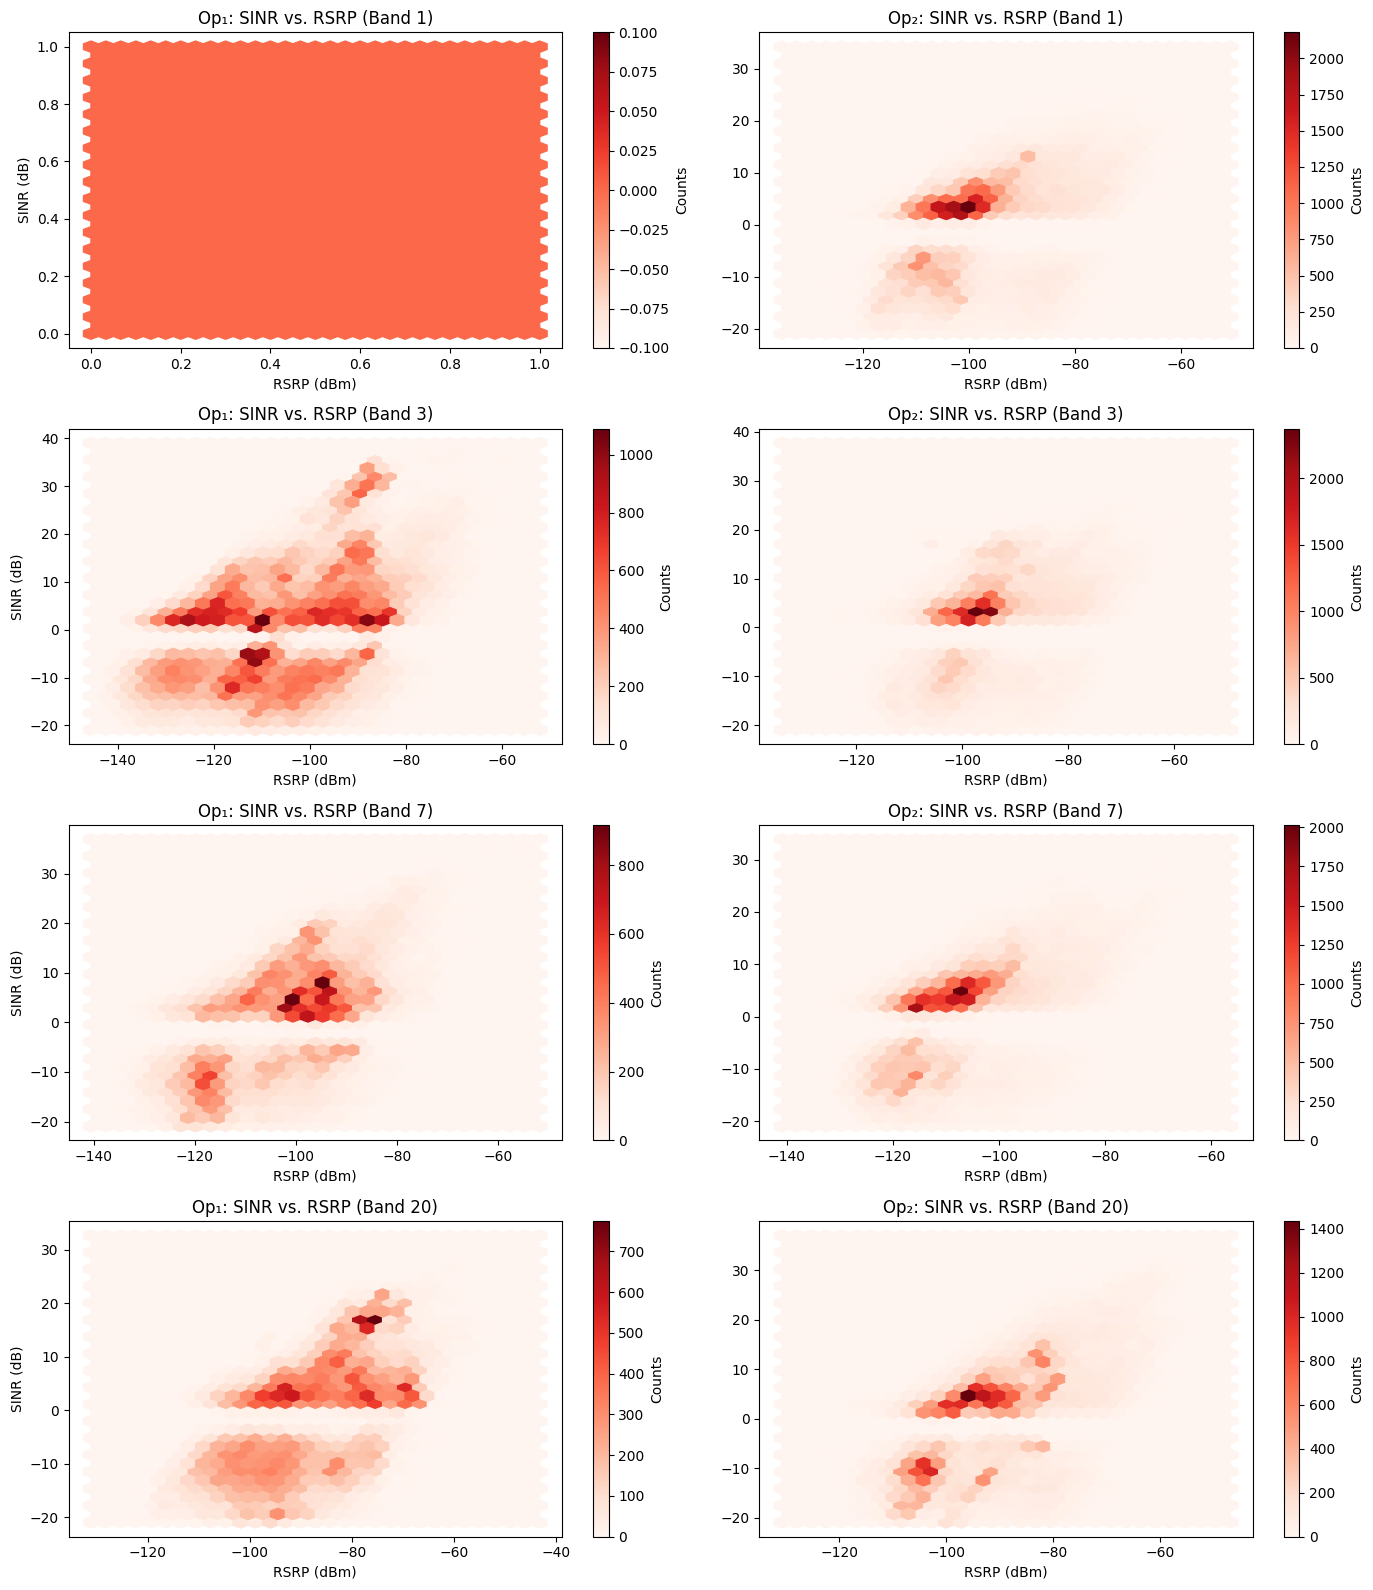

In [54]:
# Create subplots for each band
bands = [1, 3, 7, 20]  # The bands you're interested in
fig, axes = plt.subplots(len(bands), 2, figsize=(14, len(bands) * 4))#, sharex=True, sharey=True)

for i, band in enumerate(bands):
    # Filter data for the current band
    op1_band_data = op1_data[op1_data['Band'] == band]
    op2_band_data = op2_data[op2_data['Band'] == band]
    
    # Plot for Operator 1
    hb1 = axes[i, 0].hexbin(op1_band_data['RSRP'], op1_band_data['SINR'], gridsize=30, cmap='Reds')
    axes[i, 0].set_title(f'Op₁: SINR vs. RSRP (Band {band})')
    axes[i, 0].set_xlabel('RSRP (dBm)')
    axes[i, 0].set_ylabel('SINR (dB)')
    
    # Plot for Operator 2
    hb2 = axes[i, 1].hexbin(op2_band_data['RSRP'], op2_band_data['SINR'], gridsize=30, cmap='Reds')
    axes[i, 1].set_title(f'Op₂: SINR vs. RSRP (Band {band})')
    axes[i, 1].set_xlabel('RSRP (dBm)')
    
    # Add colorbars to each plot
    fig.colorbar(hb1, ax=axes[i, 0], label='Counts')
    fig.colorbar(hb2, ax=axes[i, 1], label='Counts')

# Add x-axis and y-axis ticks to all plots
plt.tight_layout()
plt.show()


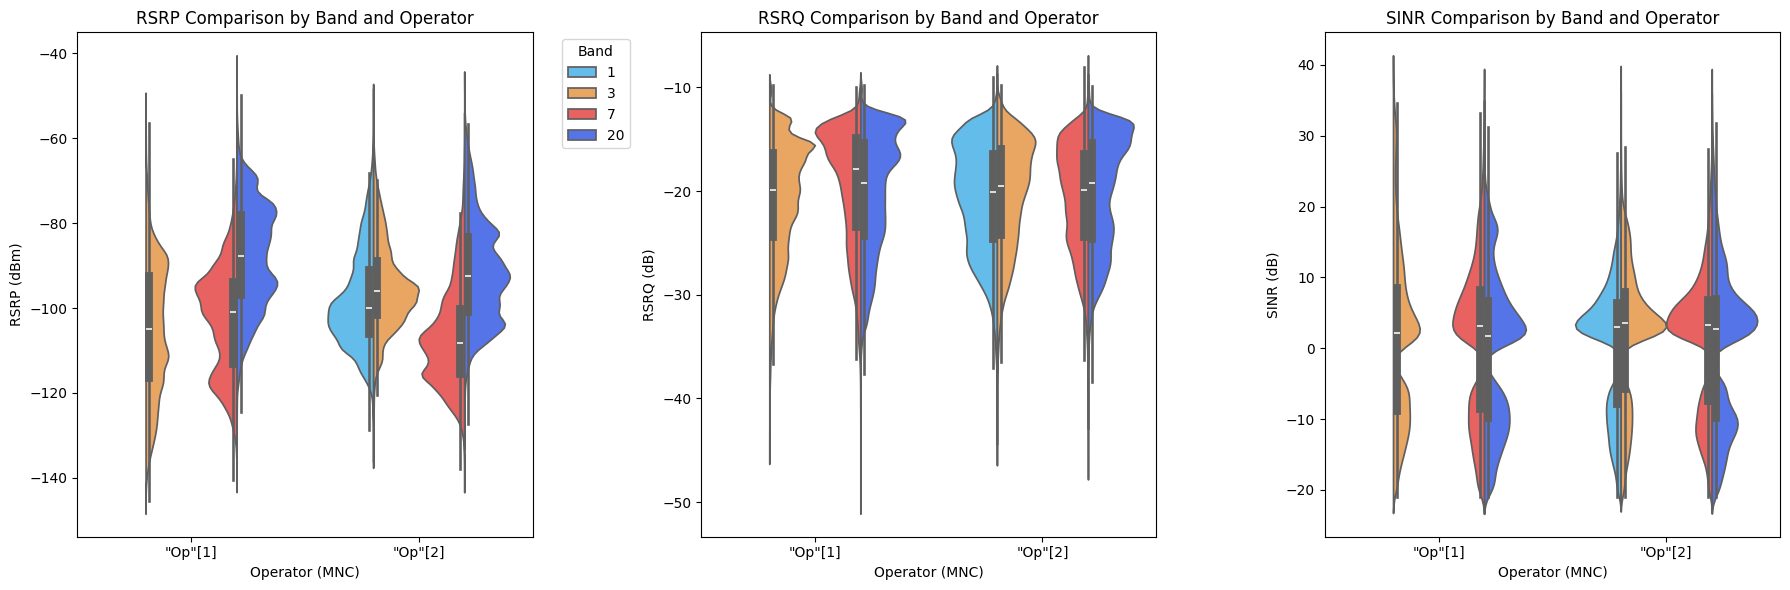

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom palette for operators
custom_palette = {"1": "#1f77b4", "2": "#d62728"}  # Blue for "Op"[1], Red for "Op"[2]
band_palette = {1: '#4dc3ff', 3: '#ffa64d', 7: '#ff4c4c', 20: '#3d66ff'}  # Custom colors for bands

# Create subplots for RSRP, RSRQ, and SINR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Violin plot for RSRP
sns.violinplot(x='MNC', y='RSRP', data=fd_4g, hue='Band', palette=band_palette, ax=axes[0], split=True)
axes[0].set_title('RSRP Comparison by Band and Operator')
axes[0].set_xlabel('Operator (MNC)')
axes[0].set_ylabel('RSRP (dBm)')
axes[0].legend(title='Band', bbox_to_anchor=(1.05, 1), loc='upper left')

# Violin plot for RSRQ
sns.violinplot(x='MNC', y='RSRQ', data=fd_4g, hue='Band', palette=band_palette, ax=axes[1], split=True)
axes[1].set_title('RSRQ Comparison by Band and Operator')
axes[1].set_xlabel('Operator (MNC)')
axes[1].set_ylabel('RSRQ (dB)')
axes[1].legend_.remove()  # Remove legend from this subplot

# Violin plot for SINR
sns.violinplot(x='MNC', y='SINR', data=fd_4g, hue='Band', palette=band_palette, ax=axes[2], split=True)
axes[2].set_title('SINR Comparison by Band and Operator')
axes[2].set_xlabel('Operator (MNC)')
axes[2].set_ylabel('SINR (dB)')
axes[2].legend_.remove()  # Remove legend from this subplot

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


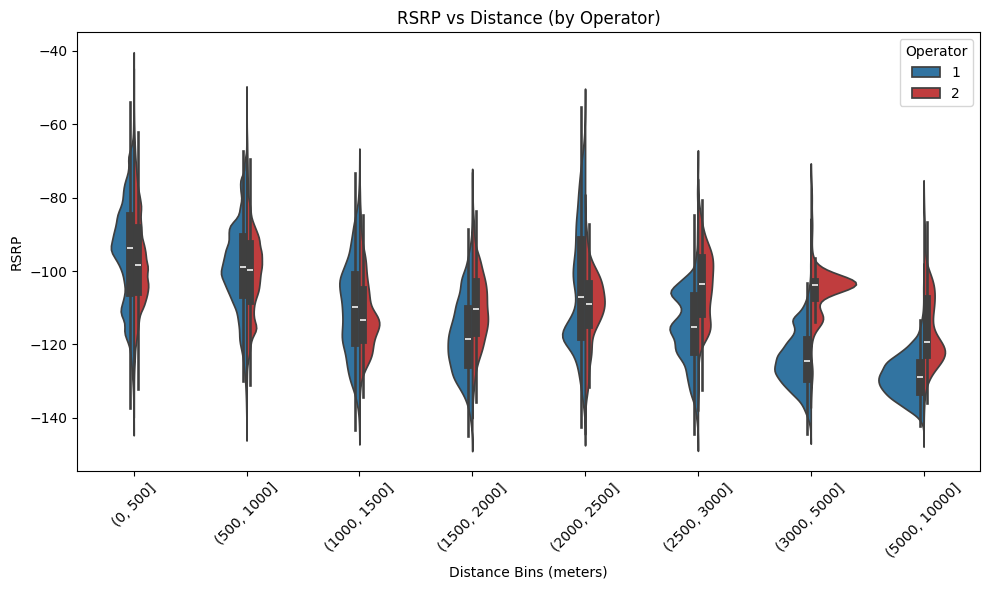

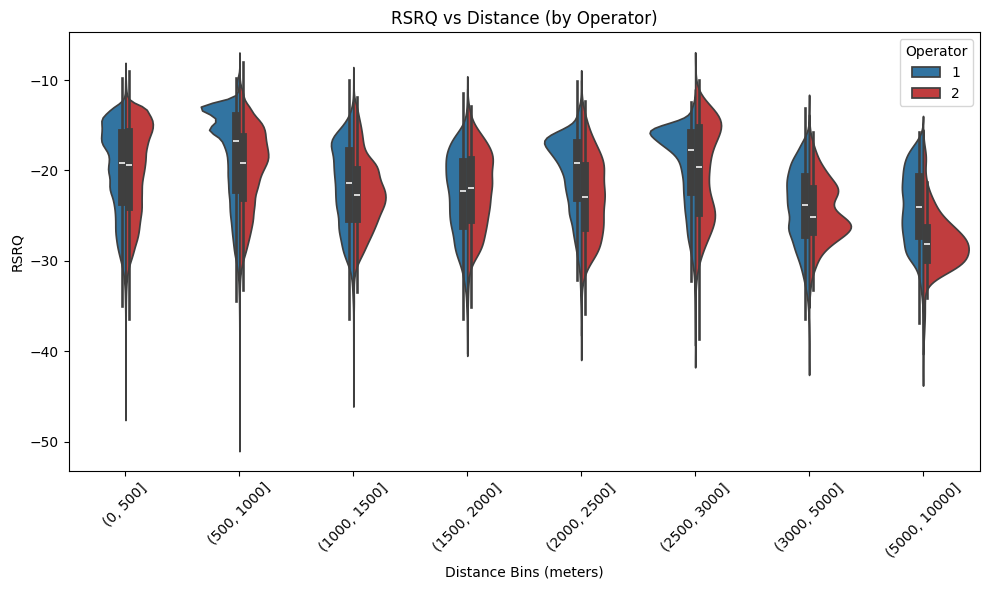

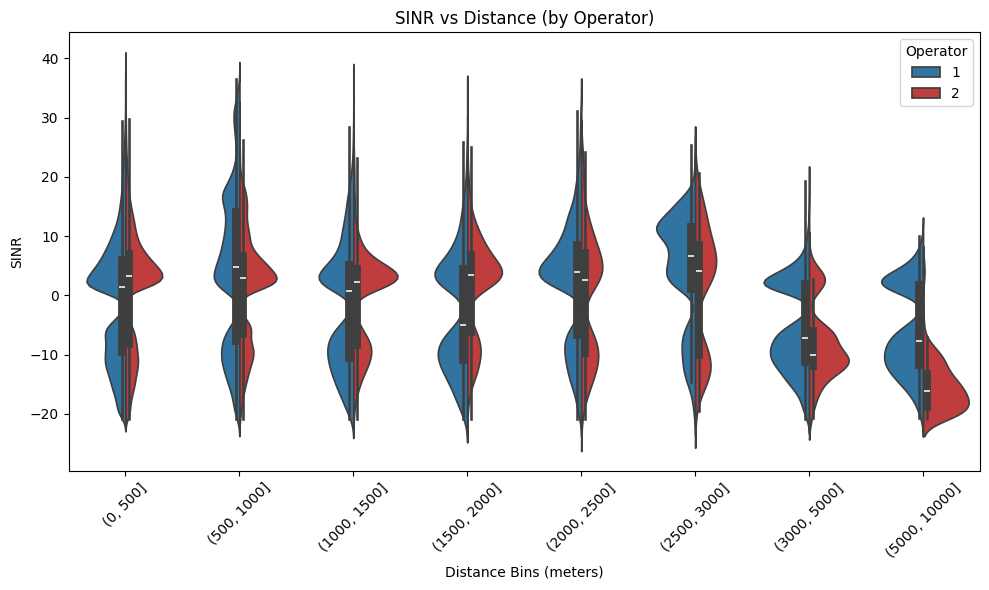

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create distance bins
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000])

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins

# Custom palette for operators using integers
custom_palette = {1: "#1f77b4", 2: "#d62728"}  # Blue for Op₁, Red for Op₂

# Function to create violin plots
def plot_violin(metric):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='distance_bin', y=metric, hue='MNC_numeric', data=filtered_data, palette=custom_palette, split=True)
    plt.title(f'{metric} vs Distance (by Operator)')
    plt.xlabel('Distance Bins (meters)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Operator')
    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin('RSRP')

# Plot for RSRQ
plot_violin('RSRQ')

# Plot for SINR
plot_violin('SINR')


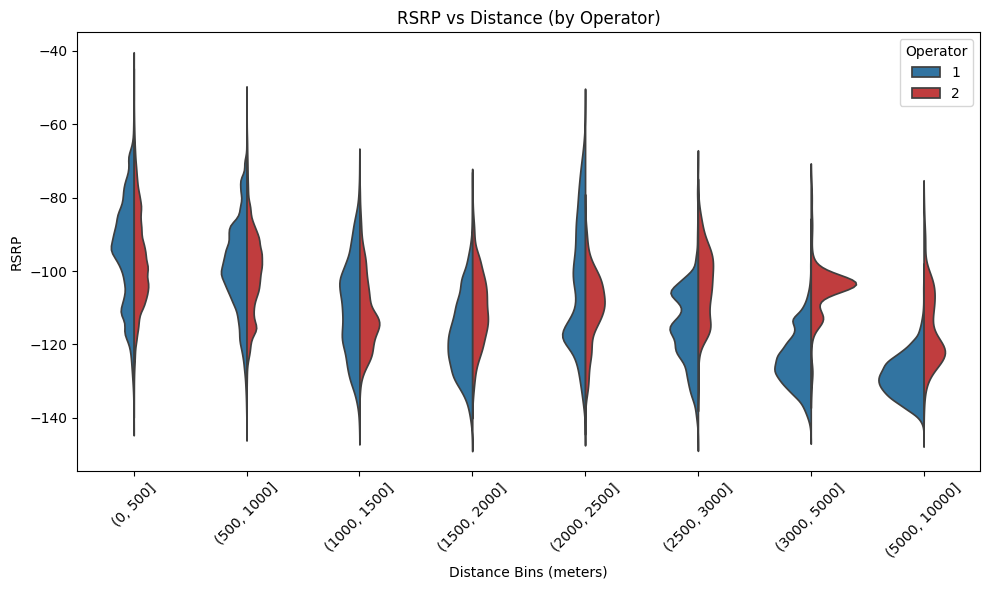

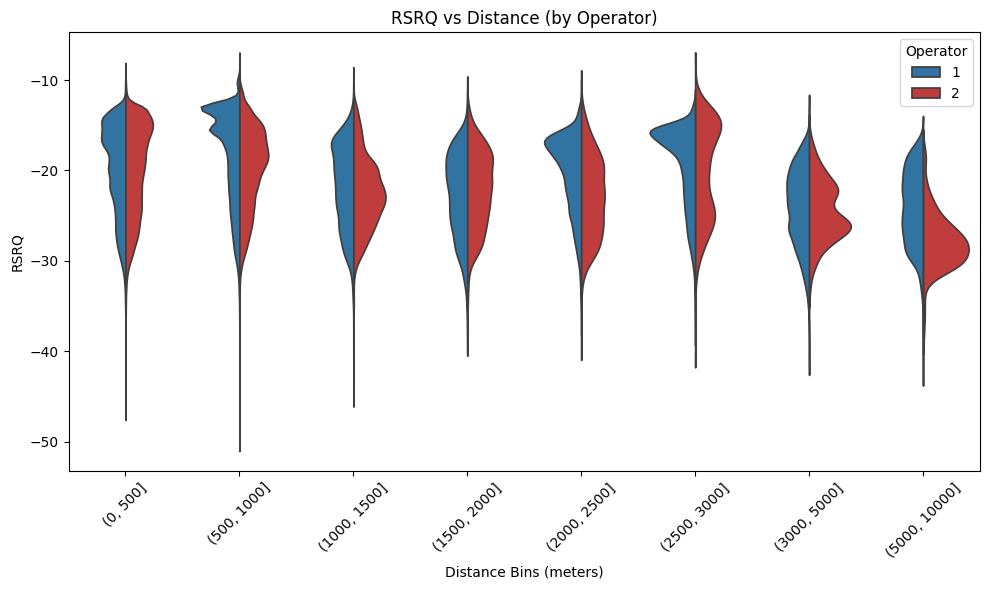

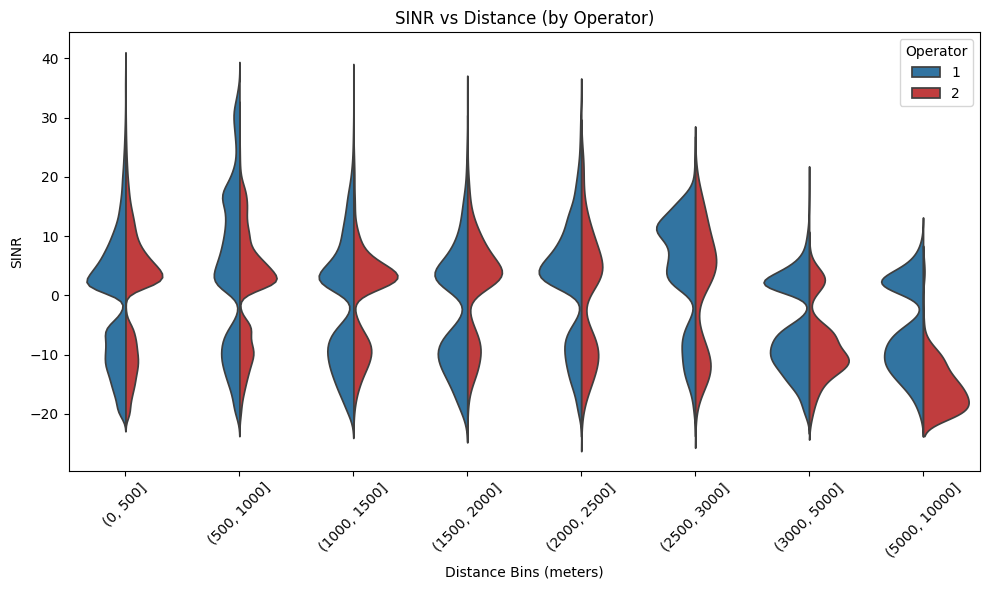

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom palette for operators using integers
custom_palette = {1: "#1f77b4", 2: "#d62728"}  # Blue for Op₁, Red for Op₂

# Function to create violin plots with cleaner visuals
def plot_violin(metric):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='distance_bin', y=metric, hue='MNC_numeric', data=filtered_data, palette=custom_palette, split=True, inner=None)  # Removed the black box plot inside
    plt.title(f'{metric} vs Distance (by Operator)')
    plt.xlabel('Distance Bins (meters)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Operator')
    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin('RSRP')

# Plot for RSRQ
plot_violin('RSRQ')

# Plot for SINR
plot_violin('SINR')


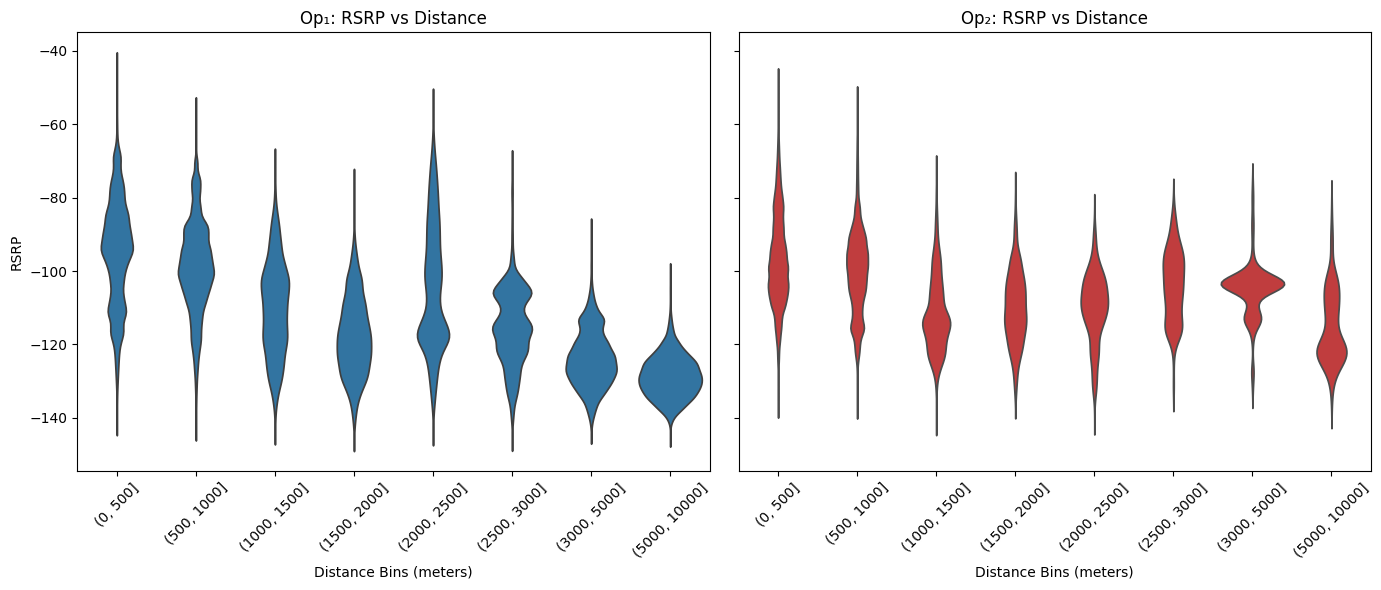

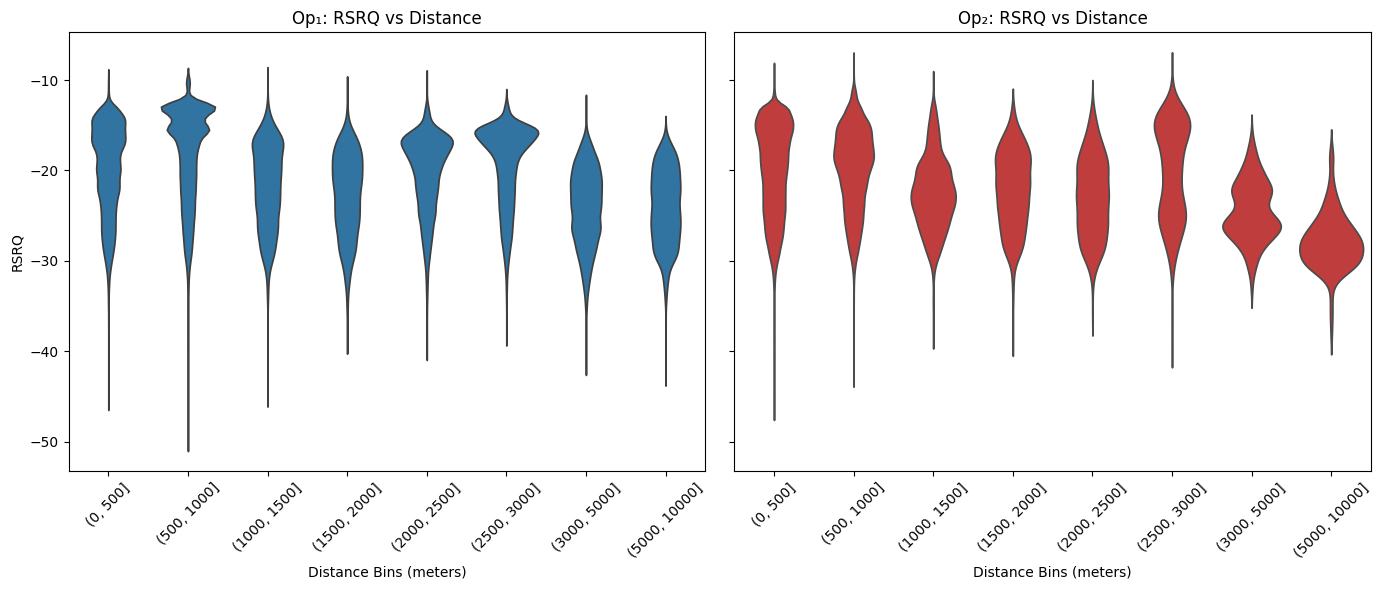

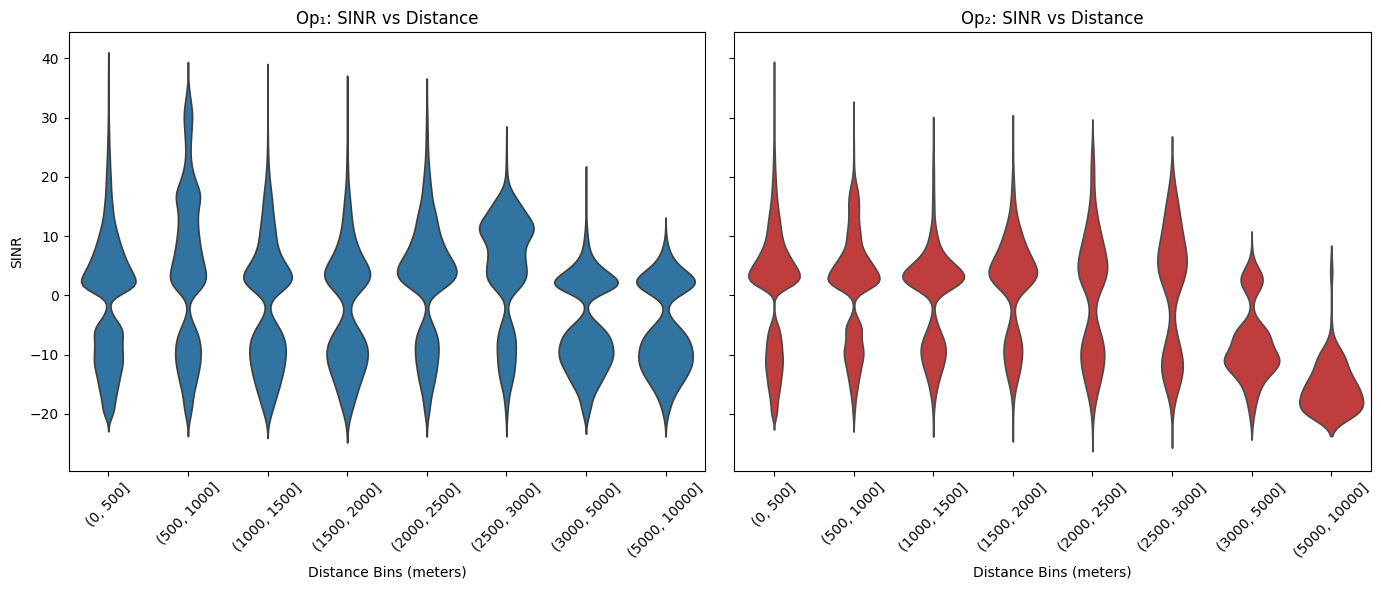

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (meters)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)  # Correct rotation without set_xticklabels

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (meters)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)  # Correct rotation without set_xticklabels

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


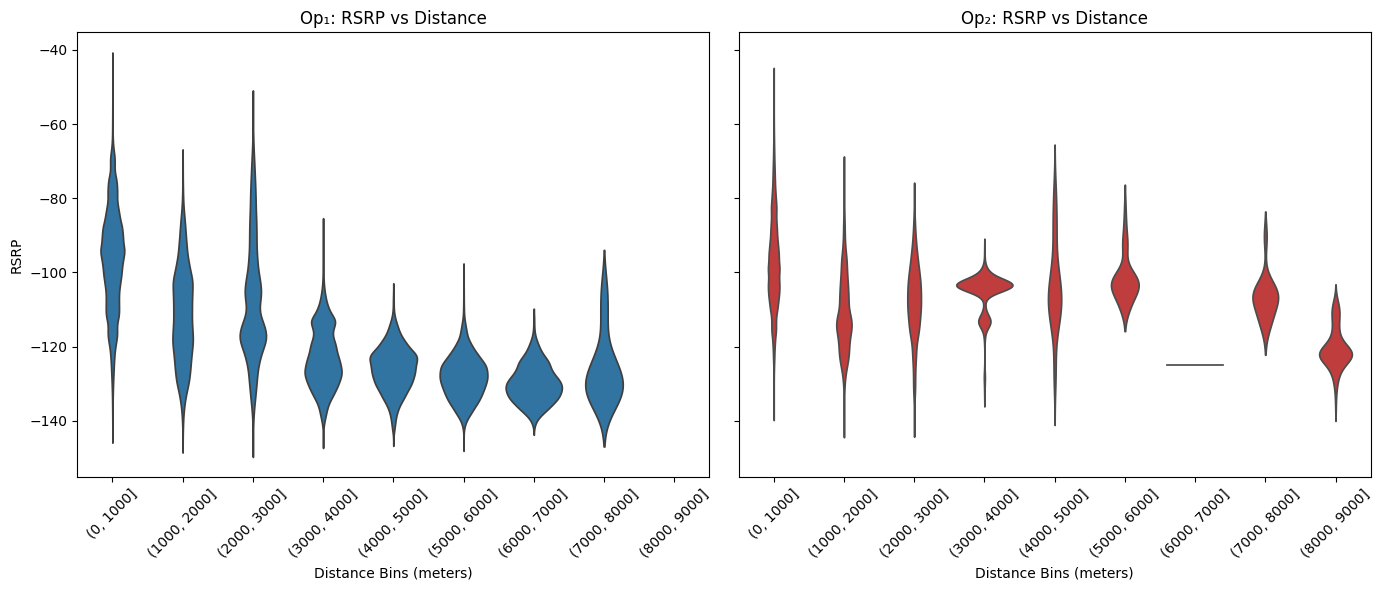

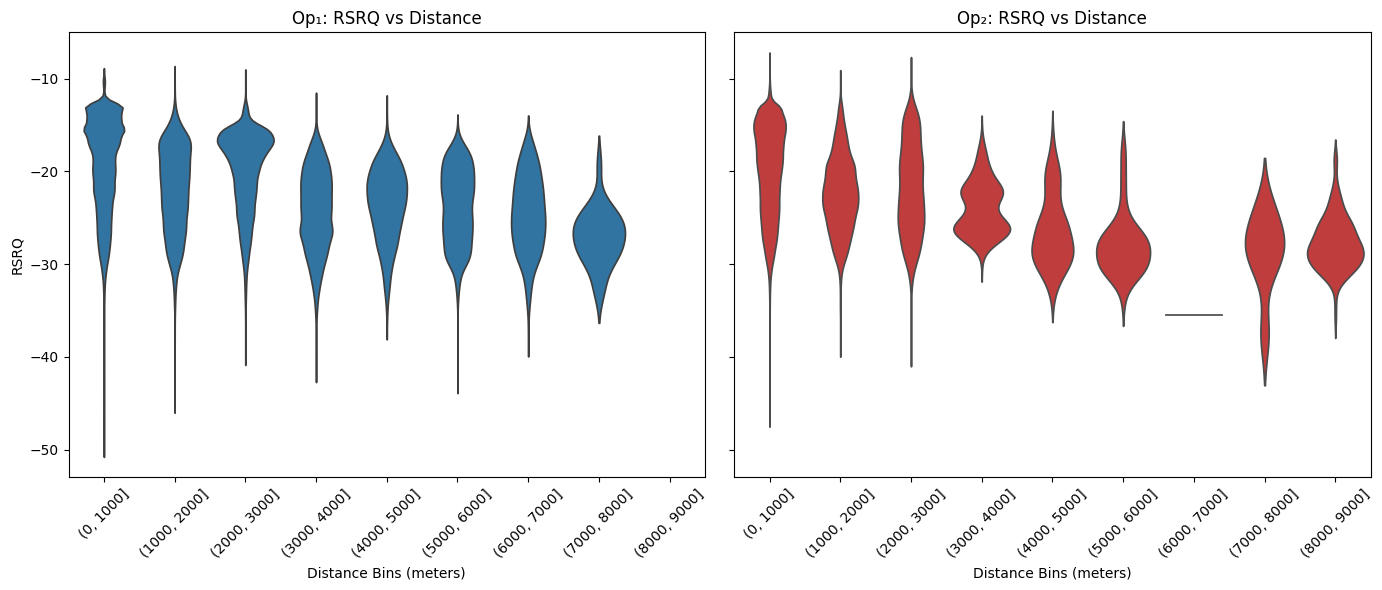

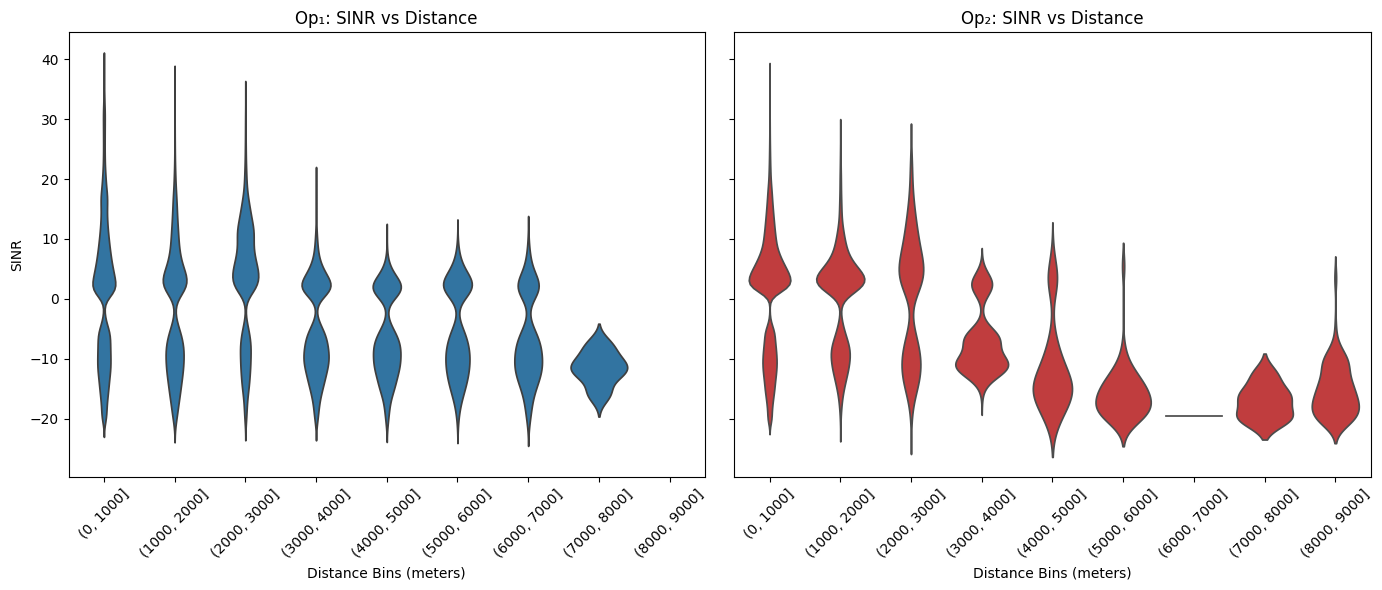

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example of fixed-width bins (you can adjust the bins as needed)
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])

# Or, use quantile-based bins for a more balanced distribution
# distance_bins = pd.qcut(filtered_data['distance'], q=8)

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (meters)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (meters)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


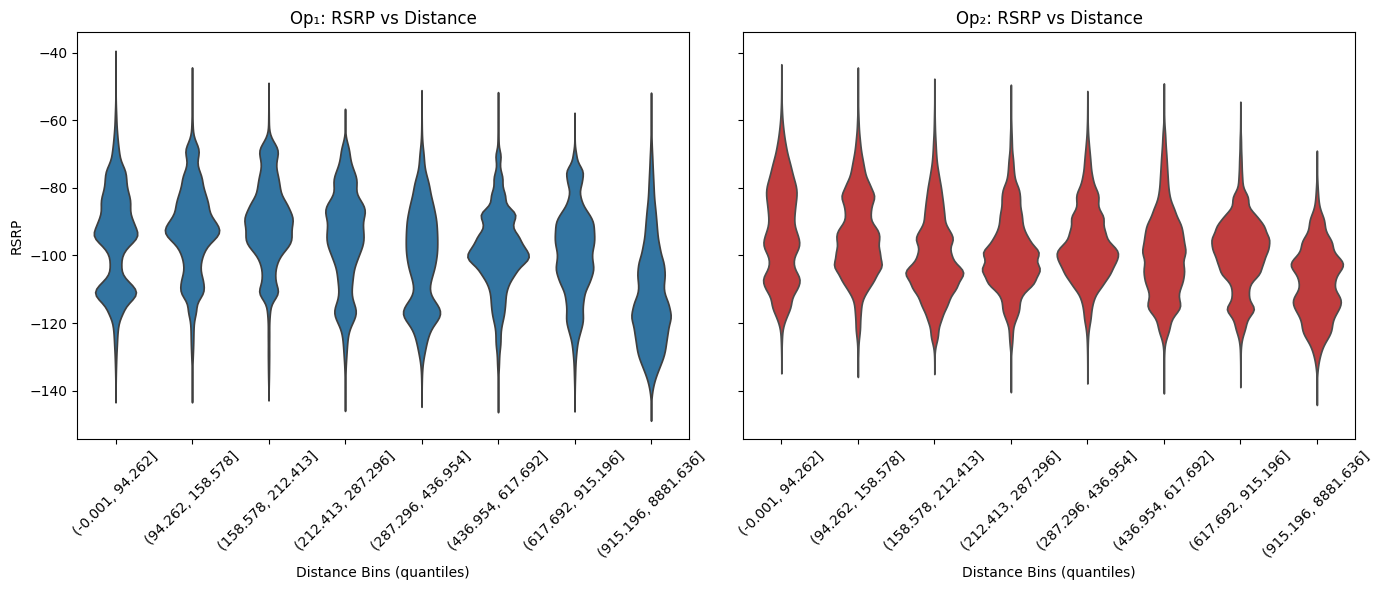

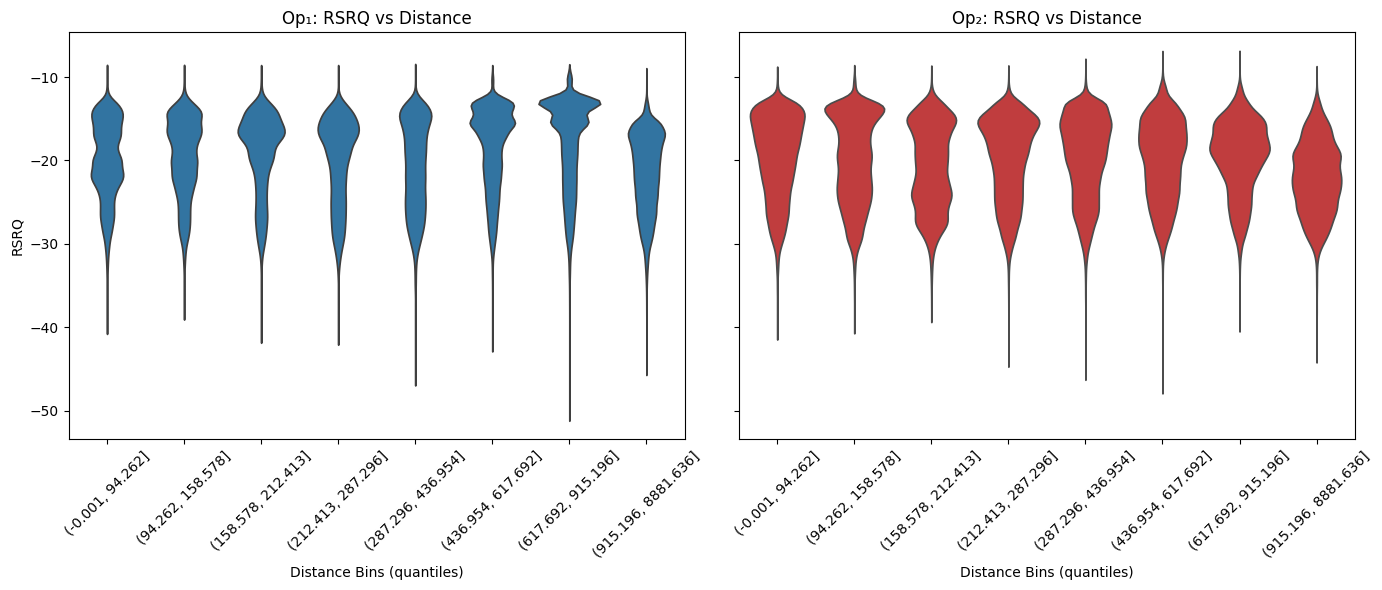

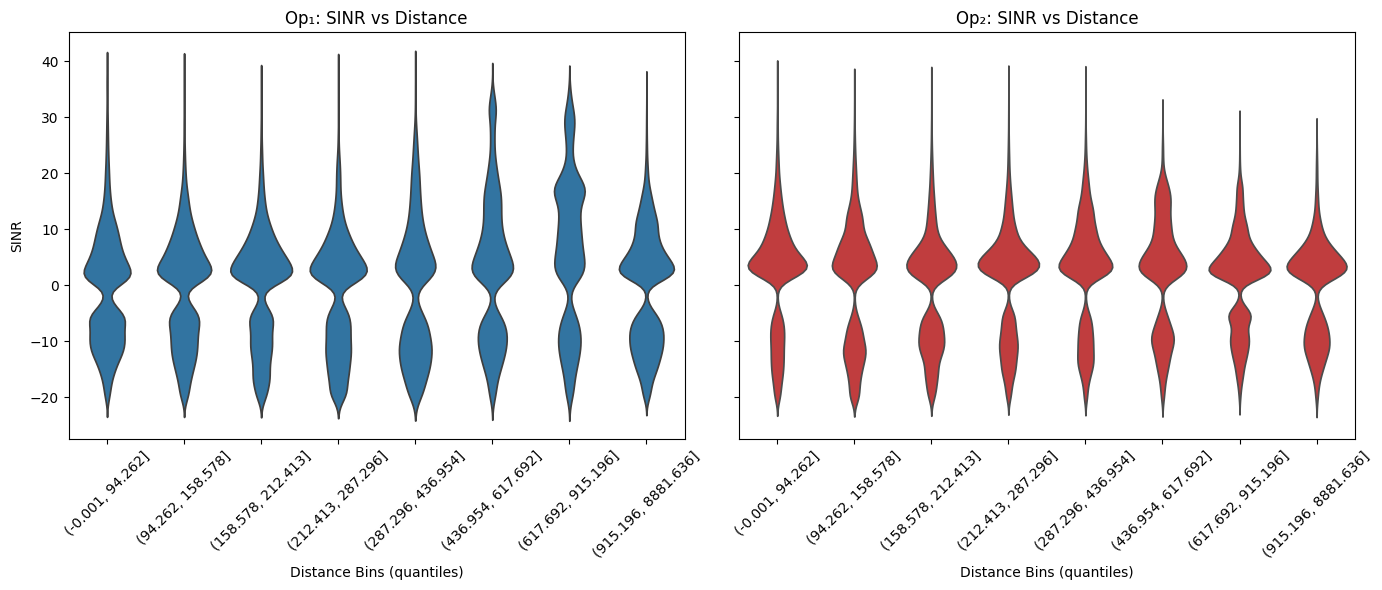

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create quantile-based distance bins with equal number of observations in each bin
distance_bins = pd.qcut(filtered_data['distance'], q=8)  # Here, q=8 creates 8 bins
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (quantiles)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (quantiles)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')
